<a href="https://colab.research.google.com/github/arad1367/WAC/blob/main/session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Matplotlib
link to documentation: https://matplotlib.org/stable/users/explain/quick_start.html

In [54]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%config InlineBackend.figure_format = 'retina'

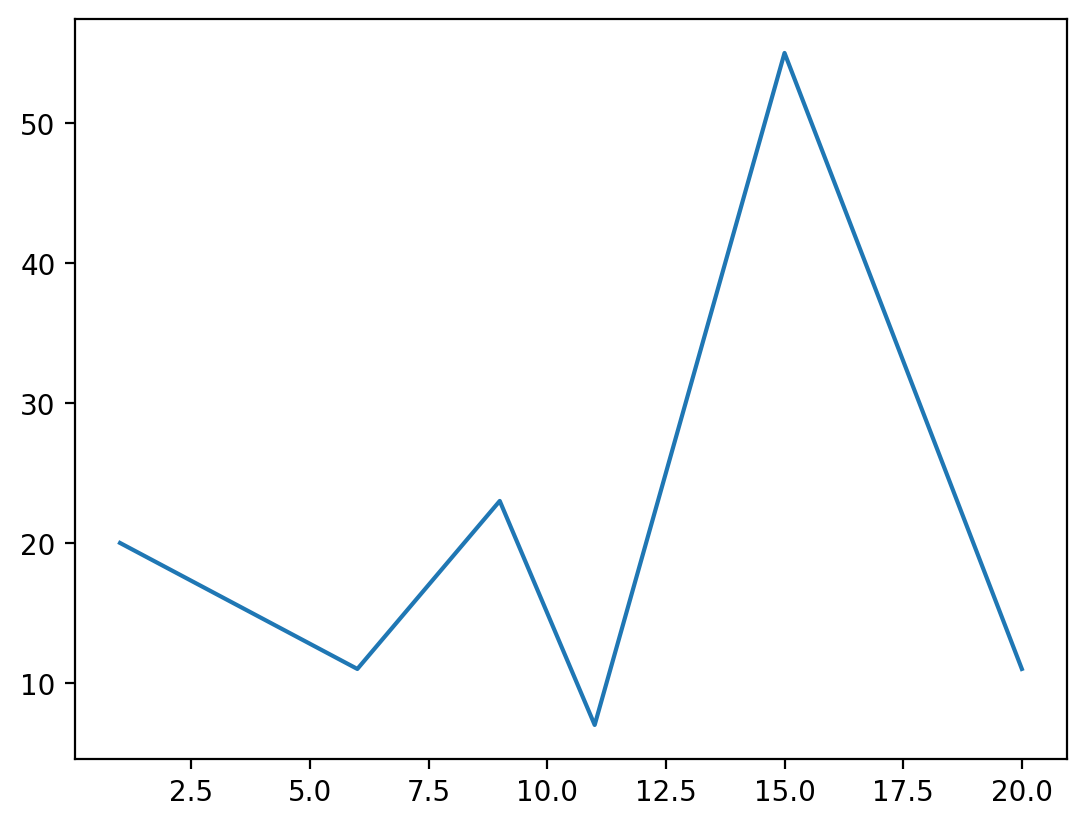

In [3]:
# simple plot

# data
x = np.array([1, 6, 9, 11, 15, 20])
y = np.array([20, 11, 23, 7, 55, 11])

# plot
plt.plot(x, y)
plt.show();

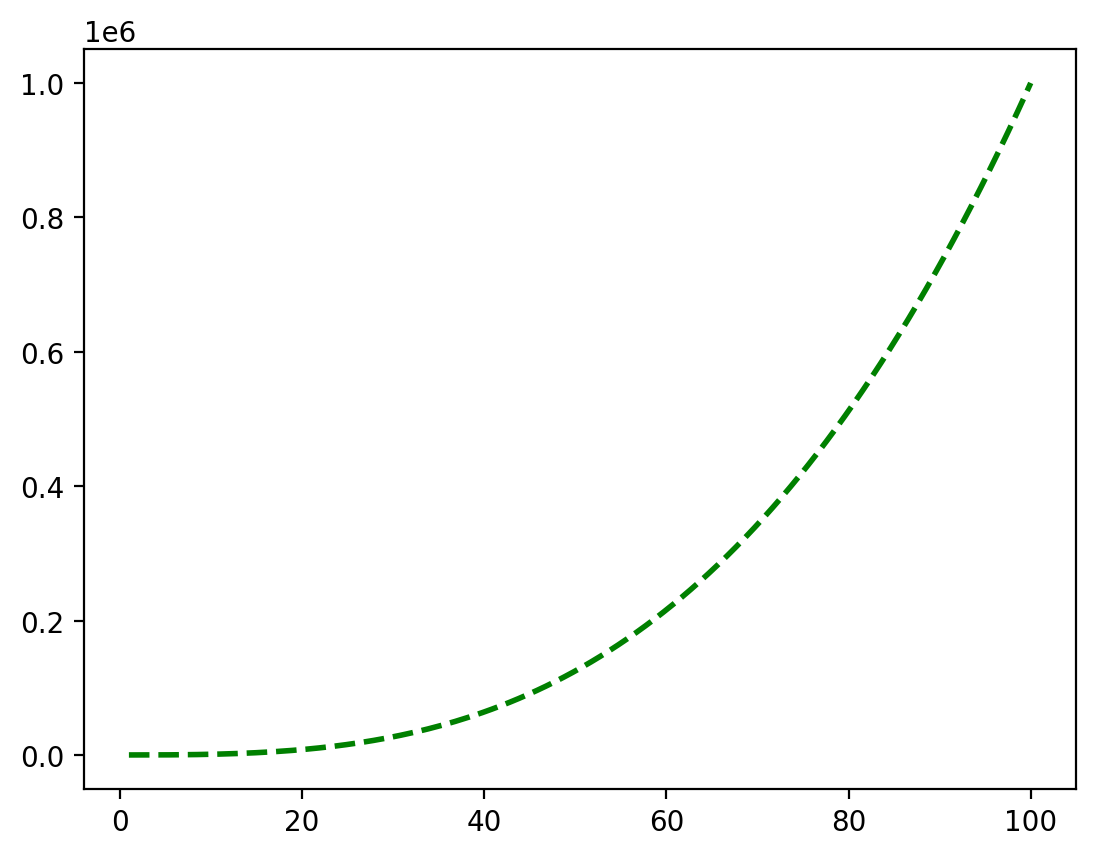

In [4]:
### Simple plots
x = np.linspace(1, 100, 200)
y = x**3

# Plot
plt.plot(x, y, linestyle='dashed', linewidth=2, color='green')
plt.show();

#### 1.1. Plot with OOP

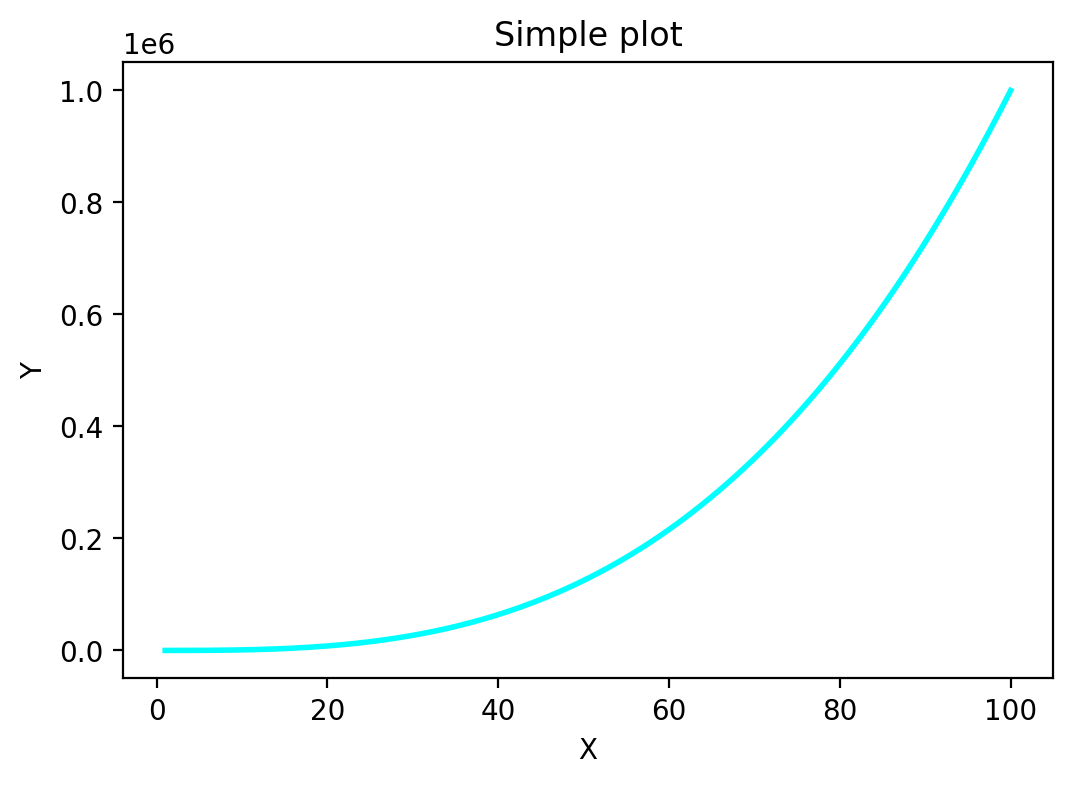

In [7]:
# Data
# x, y

# OOP format
fig, ax = plt.subplots(figsize=(6, 4))

# Plot with OOP
ax.plot(x, y, linewidth=2, color='cyan')

# set title, labels
ax.set(title="Simple plot",
       xlabel="X",
       ylabel="Y")

# Save plot
saved_fig = fig.savefig('savedfig.png')

### 1.2. Dictionary and barplots

<BarContainer object of 4 artists>

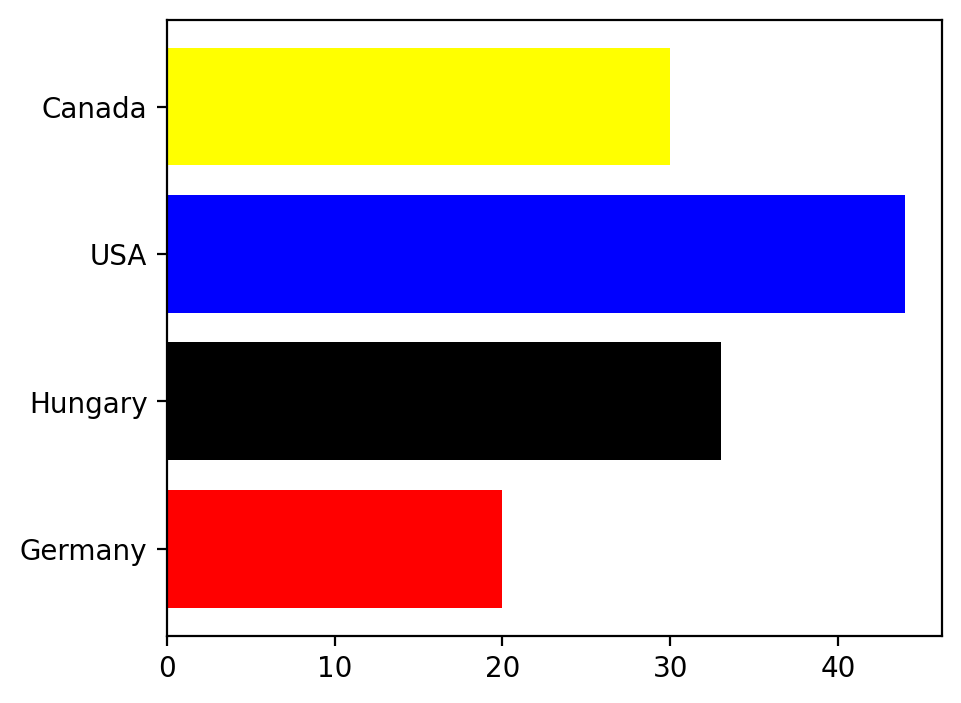

In [9]:
country = {
    "Germany": 20,
    "Hungary": 33,
    "USA": 44,
    "Canada": 30
}

# OOP format
fig, ax = plt.subplots(figsize=(5, 4))

# Make a plot based on barplot
# ax.bar(country.keys(), height=country.values(), color=['red', 'black', 'blue', 'yellow'])

# xbar
ax.barh(list(country.keys()), list(country.values()), color=['red', 'black', 'blue', 'yellow'])

### 1.3. Time series plot with a DataFrame

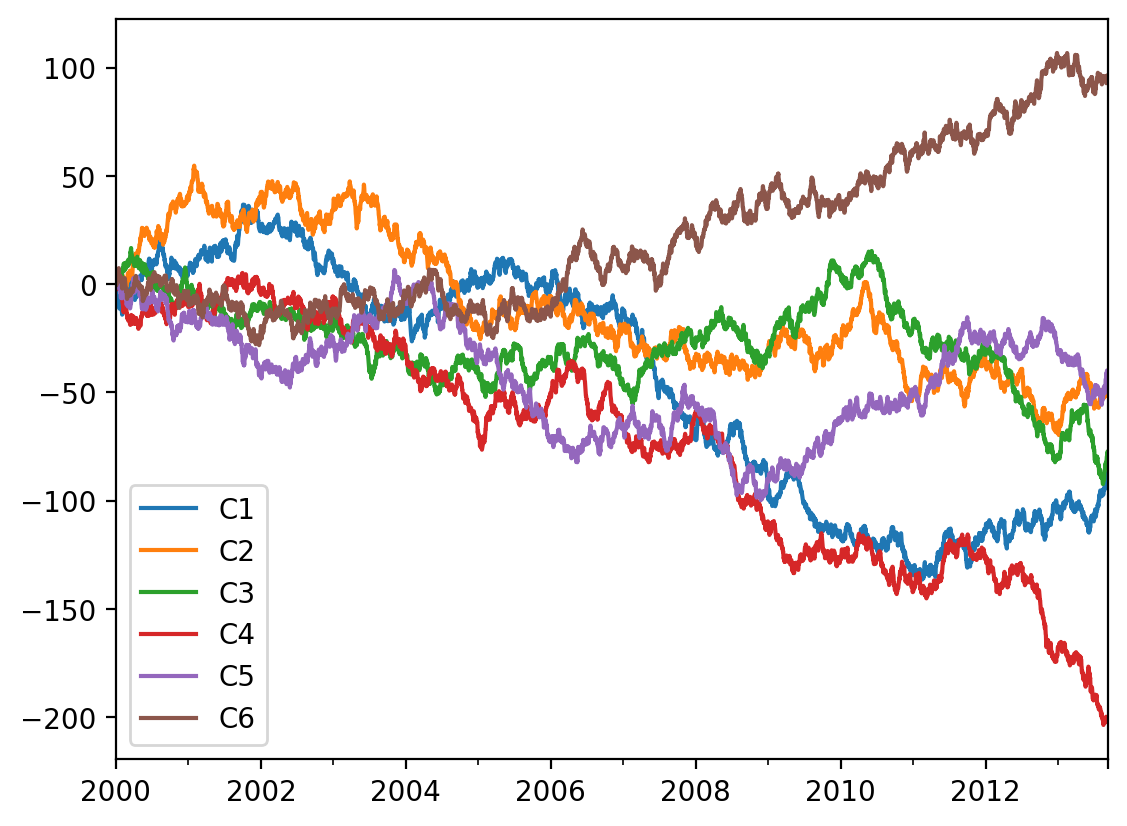

In [11]:
df_time = pd.DataFrame(data=np.random.normal(size=(5000, 6)),
                       index=pd.date_range('01/01/2000', periods=5000),
                       columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

df_time = df_time.cumsum()

df_time.plot();

### 2. Machine learning with scikit-learn (Regression problem)

Steps:
* Data
* Preprocessing (missing values, string data, ...)
* Define dependend variable(target) and independent variables(features)
* Split data(train dataset, validation dataset, test dataset)
* Make the model
* Fit the model
* Make some prediction
* Accuracy of the model
* Improvement the model(hyperparameters)

#### 2.1. data
link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [13]:
california_data = fetch_california_housing()
california_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
df = pd.DataFrame(data=california_data['data'], columns=california_data['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
### Add target variable
df['target'] = california_data['target']
df.tail(6)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


#### 2.2. Preprocessing

In [17]:
# Information about data
df.info()

# check missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

#### 2.3. x and y (features and target)

In [20]:
x = df.drop('target', axis=1)
y = df['target']

x[:5], y[:5]

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: target, dtype: float64)

#### 2.4. Split data

In [29]:
# Solution 1
# bound = math.ceil(0.7 * len(df))
# bound

# x_train, y_train = x[:bound], y[:bound]
# x_test, y_test = x[bound:], y[bound:]

# len(x_train), len(y_train), len(x_test), len(y_test)

# Solution 2
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state = 42)

len(x_train), len(y_train), len(x_test), len(y_test)

(14448, 14448, 6192, 6192)

#### 2.5. Make a model
* How to select a correct model?
link: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [34]:
models = {
    "LinearRegression": LinearRegression(),
    "SGD": SGDRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

# Make first model
linear_model = models['LinearRegression']
linear_model.get_params() # hyperparameters can help us to improve our model

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

#### 2.6. Fit the model >>> train step >>> model wants learn something

In [35]:
### Fit the first model
linear_model.fit(x_train, y_train)

LinearRegression()

#### 2.7. Predict with linear model


In [36]:
y_preds_linear = linear_model.predict(x_test)
y_preds_linear[:5]

array([0.72604907, 1.76743383, 2.71092161, 2.83514727, 2.60695807])

#### 2.8. Score of the model

In [38]:
linear_score = linear_model.score(x_test, y_test)
print(f'The prediction power of the first model is: {linear_score*100:0.2f}%')

The prediction power of the first model is: 59.58%


#### 2.9. Accuracy of the model (Regression problem)
link: https://scikit-learn.org/stable/modules/model_evaluation.html
* R2
* MAE
* MSE

In [40]:
### Define a function to use accuracy for regression problem
def accuracy_regression_models(y_true, y_pred, model):
  """
  This function can provide accuracy criteria for regression models.
  R2, MSE, MAE
  """
  r2 = r2_score(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  result = {
      'R2':r2,
      'MSE':mse,
      'MAE':mae
  }
  return result

In [41]:
linear_model_accuracy = accuracy_regression_models(y_test, y_preds_linear, models['LinearRegression'])
linear_model_accuracy

{'R2': 0.595770232606166, 'MSE': 0.5305677824766758, 'MAE': 0.5272474538305952}

In [42]:
models

{'LinearRegression': LinearRegression(),
 'SGD': SGDRegressor(),
 'RandomForestRegressor': RandomForestRegressor()}

In [44]:
### Second model

# Data x, y

# Split data

# Make the model
SGD_model = models['SGD']
SGD_model.get_params()

# Fit the model
SGD_model.fit(x_train, y_train)

# Make some prediction
y_preds_SGD = SGD_model.predict(x_test)

# Accuracy
SGD_model_accuracy = accuracy_regression_models(y_test, y_preds_SGD, models['SGD'])
SGD_model_accuracy

{'R2': -5.68081352709244e+27,
 'MSE': 7.456295599320364e+27,
 'MAE': 52245869298446.82}

In [46]:
### RandomForesRegressor

# Data x, y

# Split data is done

# Make the model
RF_model = models['RandomForestRegressor']
RF_model.get_params()

# Fit the model
RF_model.fit(x_train, y_train)

# Make some prediction
y_preds_RF = RF_model.predict(x_test)

# Accuracy
RF_model_accuracy = accuracy_regression_models(y_test, y_preds_RF, models['RandomForestRegressor'])
RF_model_accuracy

{'R2': 0.8079201344949293,
 'MSE': 0.25211252737889794,
 'MAE': 0.3292984540051681}

### Improvement Our model based on hyperparameters

In [48]:
RF_model.score(x_test, y_test)   # n_estimators = 100

0.8079201344949293

In [51]:
### RandomForesRegressor

# Data x, y

# Split data is done


for n in range(10, 200, 50):
  RF_model = RandomForestRegressor(n_estimators=n)
  # Fit the model
  RF_model.fit(x_train, y_train)
  # Accuracy
  score = RF_model.score(x_test, y_test)
  print(f'For n_estimators:{n}, R2:{score*100:0.2f}%')

For n_estimators:10, R2:78.62%
For n_estimators:60, R2:80.48%
For n_estimators:110, R2:80.45%
For n_estimators:160, R2:80.69%


### Compare our model

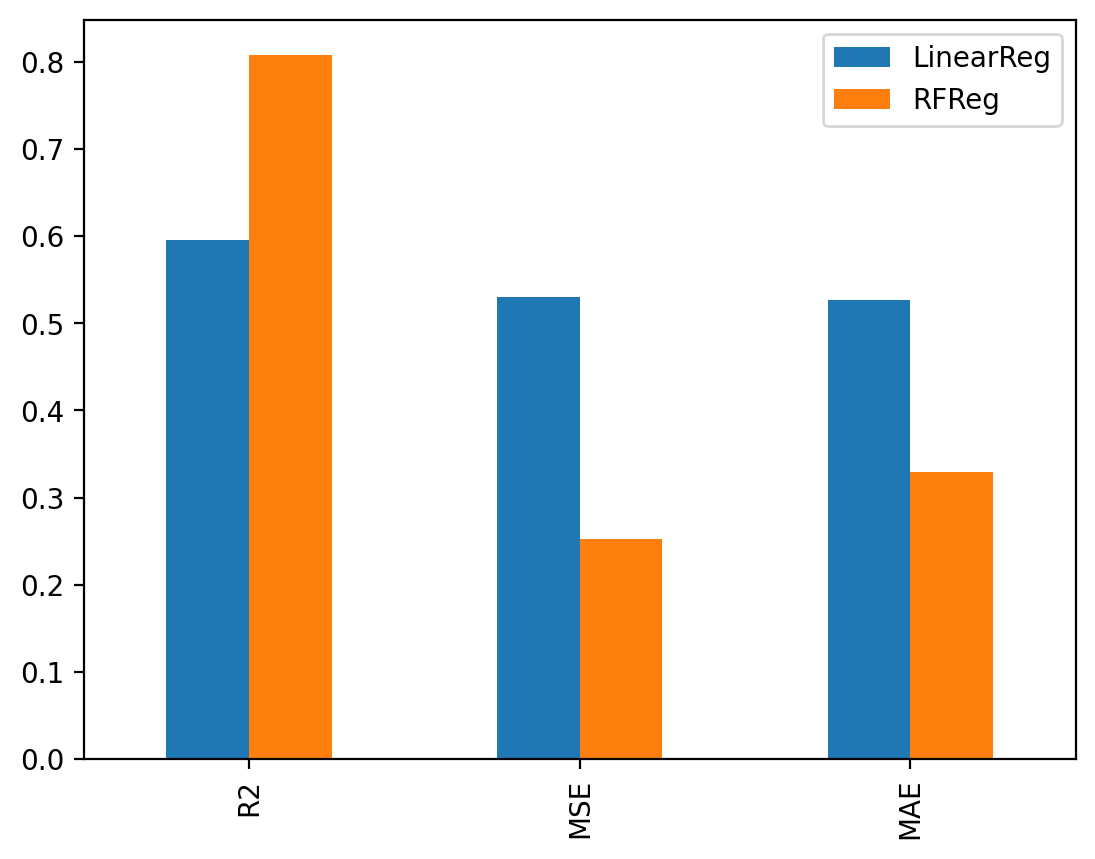

In [53]:
compare_plot = {
    "LinearReg": linear_model_accuracy,
    "RFReg": RF_model_accuracy
}

# Make a DataFrame
df_plot = pd.DataFrame(data=compare_plot)

# Plot our models
df_plot.plot.bar();

### How to save a selected model

In [55]:
pickle.dump(RF_model, open('RFmodel.pkl', 'wb'))

In [56]:
### Load the model and predict something new with selected model
loaded_RF_model = pickle.load(open('RFmodel.pkl', 'rb'))
loaded_RF_model

RandomForestRegressor(n_estimators=160)

In [57]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
new_prediction = loaded_RF_model.predict([[6.5, 55, 6.78, 2.45, 1000, 2.3, 37.88, -122.22]])
new_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.8602145])